# HHL Algorithm

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/case_library/mindspore_hhl_algorithm.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/case_library/mindspore_hhl_algorithm.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/case_library/hhl_algorithm.ipynb)

## Overview

**Objective of the HHL algorithm:** Given a Hermitian matrix $A$ and a unit vector $\vec{b}$, the goal is to solve the equation $A \vec{x} = \vec{b}$.

Let $\left| b \right\rangle = \sum_{j=1}^{N} b_{j} \left| j \right\rangle$, where $\left| j \right\rangle$ represents the basis states. The key of the algorithm lies in simulating $e^{i A \Delta t}$ on $\left| b \right\rangle$.

Assume the spectral decomposition of $A$ is as follows:

$$A = \sum_{j=1}^{N} \lambda_{j} \left| u_{j} \right\rangle \left\langle u_{j} \right|$$

Then,

$$e^{i A \Delta t} = \sum_{j=1}^{N} e^{i \lambda_{j} \Delta t} \left| u_{j} \right\rangle \left\langle u_{j} \right|$$

Express $\left| b \right\rangle$ in terms of the basis $\left\lbrace \left| u_{j} \right\rangle \right\rbrace$: $\left| b \right\rangle = \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle$.

Using Quantum Phase Estimation (QPE), where $U = e^{i A \Delta t}$, the resulting transformation is as follows:

$$\left| b \right\rangle \xrightarrow{\text{QPE}} \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle | \widetilde{\lambda_j} \rangle$$

Here, $| \widetilde{\lambda_j} \rangle$ is the estimation of the eigenvalue $\lambda_{j}$ (the tilde represents an estimation, the same applies in the following).

It is easy to see that the solution to the equation is:

$$\left| x \right\rangle = A^{-1} \left| b \right\rangle = \sum_{j} \beta_{j} (\lambda_{j})^{-1} \left| u_{j} \right\rangle$$

Therefore, we only need to extract the information from the quantum state $| \widetilde{\lambda_j} \rangle$.

## Steps of the HHL Algorithm

Below, we provide a detailed explanation of the steps involved in the HHL algorithm, including the mathematical derivations.

### Data Preprocessing

As mentioned earlier, $A$ needs to be Hermitian, i.e., $A^\dagger = A$. However, this condition can be relaxed. If $A$ is not Hermitian, we can construct $\tilde{A}$ as follows:

$$
\tilde{A} = \begin{pmatrix}
0 & A \\
A^{\dagger } & 0 \\
\end{pmatrix}
$$

Then, we solve the equation:

$$
\tilde{A} \vec{y} = \begin{pmatrix}
\vec{b} \\
0 \\
\end{pmatrix}
$$

It can be easily verified that the solution to this equation, $\vec{y}$, has the following form:

$$
\vec{y} = \begin{pmatrix}
0 \\
\vec{x} \\
\end{pmatrix}
$$

where $A \vec{x} = \vec{b}$.

For $\vec{b}$, since HHL is a quantum algorithm, the input should be a quantum state $|b\rangle = \sum_{j=1}^N b_j |j\rangle$. The details of how to prepare such a quantum state and encode classical information into quantum information are beyond the scope of this algorithm. Here, we assume that the quantum state has been prepared accordingly.

### Preparation of Operator $U = e^{i A \Delta t}$

The efficient preparation of the operator $U = e^{i A \Delta t}$ is a core problem. As we will see later, the complexity of the entire HHL algorithm mainly depends on the operator $U$, so it is necessary to efficiently simulate $U$.

The preparation of this time evolution operator $U = e^{i A \Delta t}$ belongs to the problem of quantum system simulation (Hamiltonian simulation), which is an important quantum problem that will not be discussed in detail here.

In the original paper, a **sparsity** constraint was imposed on the matrix $A$ in order to efficiently simulate $e^{i A \Delta t}$. For general dense matrices $A$, simulating their evolution can be computationally expensive.

Here, we won't go into the proof of the correctness of QPE. Readers only need to know that the input of QPE is a unitary operator $U$ and its eigenvector $|u\rangle$, and the output is an estimate $\tilde{\varphi}$ of the phase $\varphi$ such that $U |u\rangle = e^{2 \pi i \varphi} |u\rangle$.

Specifically, using $t$ auxiliary qubits, the action of QPE is as follows:

$$\left| b \right\rangle \left| 0 \right\rangle^{\otimes t} \left| 0 \right\rangle = \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle \left| 0 \right\rangle^{\otimes t} \left| 0 \right\rangle
\xrightarrow{\text{QPE}} \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle \left| \widetilde{\varphi_j} \right\rangle \left| 0 \right\rangle$$

Here, $\left| \widetilde{\varphi_j} \right\rangle$ is the estimate of the phase $\varphi_{j}$. An additional auxiliary qubit is added after the $t$ auxiliary qubits for the subsequent rotation step.

To better understand, let's take an example:
Take

$$A = Z = \left| 0 \right\rangle \left\langle 0 \right| - \left| 1 \right\rangle \left\langle 1 \right|$$

Then

$$U = e^{i A \Delta t } = e^{i \Delta t} \left| 0 \right\rangle \left\langle 0 \right| + e^{-i \Delta t} \left| 1 \right\rangle \left\langle 1 \right|$$

The two phases are $\varphi_{1} = \Delta t / 2 \pi$ and $\varphi_{2} = -\Delta t / 2 \pi$.

If we use $t = 4$ auxiliary qubits and take $\Delta t = \pi / 4$, then $\varphi_{1} = 1 / 8$ and $\varphi_{2} = - 1 / 8$.

The estimated values of the two phases are $\widetilde{\varphi_1} = 0.0010 \times 2^4 = 2$ and $\widetilde{\varphi_2} = 0.1110 \times 2^4 = 14$.
Since the phase is a decimal between $[0, 1)$, multiplying it by $2^t$ gives its corresponding quantum state $|q_{t_1} \ldots q_{t_t} \rangle$.
It should be noted that because the phase is a decimal modulo $1$, $-0.0010$ is mapped to $0.1110$. To restore the phase (to restore $\lambda$), we first select a small enough $\Delta t$ such that $|\varphi| < 1 / 2$. This way, if $|q_{t_1} \ldots q_{t_t}\rangle < 2^{t-1}$ corresponds to a positive number, $|q_{t_1}\ldots q_{t_t}\rangle > 2^{t-1}$ corresponds to a negative number.

Through simple quantitative calculations, we obtain the following mapping relationship:

$$
\frac{\lambda \Delta t}{2 \pi} =   \varphi = \begin{cases}
\tilde{\varphi} / 2^{t} &  , \varphi > 0 & , \tilde{\varphi} < 2^{t-1} \\
\tilde{\varphi} / 2^{t} - 1 & , \varphi < 0 & , \tilde{\varphi} > 2^{t-1}\\
\end{cases}
$$

Here, $\lambda$ is the eigenvalue of $A$, $\varphi$ is the phase of $U = e^{i A \Delta t}$, and $\tilde{\varphi}$ is the estimate of $\varphi$.

### Conditional Rotation

After QPE, the overall quantum state is as follows:

$$
\sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle \left| \widetilde{\varphi_j} \right\rangle \left| 0 \right\rangle
$$

To extract the information of $\lambda_j$ from the quantum state $\left| \widetilde{\varphi_j} \right\rangle$, we need to use conditional rotation gates $CR(k)$, which have the following effect:

$$
CR(k) \left| \tilde{\varphi} \right\rangle \left| b \right\rangle = \begin{cases}
\left| \tilde{\varphi} \right\rangle \left| b \right\rangle & ,  k \neq \tilde{\varphi}  \\
\left| \tilde{\varphi} \right\rangle R_y \left( 2 \arcsin \frac{C}{\lambda} \right) \left| b \right\rangle & , k = \tilde{\varphi} \\
\end{cases}
$$

In simple terms, the rotation operation is only applied to the subsequent qubits when $k$ selects the correct $\tilde{\varphi}$.

Since we don't know the correct $\tilde{\varphi}$, we brute force all possible $CR(k)$, where $k = 1, \ldots , 2^{t}-1$.

The effect of the rotation is straightforward:

$$
\prod_{k=1}^{2^{t} - 1} I\otimes CR(k) \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle \left| \widetilde{\varphi_j} \right\rangle \left| 0 \right\rangle
= \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle \left| \widetilde{\varphi_j} \right\rangle \left( \sqrt{1 - \left( \frac{C}{\lambda_{j}} \right)^{2}} \left| 0 \right\rangle + \frac{C}{\lambda_{j}} \left| 1 \right\rangle \right)
$$

After applying inverse QPE once again, the overall quantum state is as follows:

$$
\left| \psi \right\rangle = \sum_{j=1}^{N} \beta_{j} \left| u_{j} \right\rangle \left| 0 \right\rangle^{\otimes t} \left( \sqrt{1 - \left( \frac{C}{\lambda_{j}} \right)^{2}} \left| 0 \right\rangle + \frac{C}{\lambda_{j}} \left| 1 \right\rangle \right)
$$

### Measurement

Measure the last qubit. When the measurement result is $\left| 1 \right\rangle$, the probability is

$$
p_1 = C^{2} \sum_{j=1}^{N} ( \beta_{j} / \lambda_{j} )^{2}
$$

After the measurement, the quantum state becomes

$$
\left| \psi_{1} \right\rangle = \frac{1}{\left( \sum_{j=1}^{N} \left( \beta_{j} / \lambda_{j} \right)^{2} \right)^{-1}} \sum_{j=1}^{N} \frac{\beta_{j}}{\lambda_{j}} \left| u_{j} \right\rangle \left| 0 \right\rangle^{\otimes t} \left| 1 \right\rangle
$$

Clearly, there is no entanglement between the three quantum registers at this point. If we only look at the first quantum register, it is already in the state $|x\rangle$ (ignoring a normalization factor).

It should be noted that there is a parameter $C$ in the rotation operation. We see that $C$ does not affect the correctness of the final result, but it does affect the probability $p_1$ of obtaining the result. We certainly hope that $C$ can be as large as possible, so that $p_1$ can be maximized. However, $C \leq \left\vert \lambda_{j} \right\vert$, it is smaller than the absolute value of all eigenvalues. If there is no prior information about the smallest absolute value of $\lambda$, we can only conservatively choose a very small $C$ and then use amplitude amplification techniques to increase the probability of obtaining the result.

## Implementation with MindQuantum

Here, we use MindQuantum to implement a simple example to illustrate the process and correctness of the HHL algorithm.

For convenience, we choose a simple matrix $A = Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}$, because its time evolution operator $e^{i Z \Delta t} = R_z(- 2 \Delta t)$ is relatively easy to implement.

In [1]:
import numpy as np

A = np.array([[1, 0], [0, -1]])
es, vs = np.linalg.eig(A)

print(f"eigenvalues of A:\n {es}")
print(f"eigenvectors of A:\n {vs}")

b = np.array([0.6, 0.8])
print(f"b: {b}")
print(f"Solution of Ax=b is: {np.linalg.solve(A, b)}")

eigenvalues of A:
 [ 1. -1.]
eigenvectors of A:
 [[1. 0.]
 [0. 1.]]
b: [0.6 0.8]
Solution of Ax=b is: [ 0.6 -0.8]


Here, we import various required functions:

In [2]:
from mindquantum.core.gates import H, X, RY, RZ, Measure, Power, BARRIER
from mindquantum.core.circuit import Circuit
from mindquantum.simulator import Simulator

For the preparation of the quantum state $|b\rangle = \cos\theta |0\rangle + \sin\theta |1\rangle$, it can be achieved using an $R_y(2 \theta)$ gate.

The following code prepares the state $|b\rangle = 0.6 |0\rangle + 0.8 |1\rangle$ and performs a measurement.

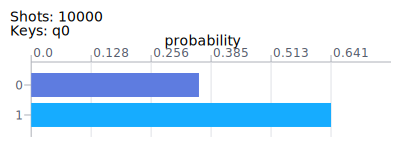

In [3]:
circ = Circuit()
circ += RY(2 * np.arcsin(0.8)).on(0)
circ += Measure().on(0)

sim = Simulator(backend="mqvector", n_qubits=1)
res = sim.sampling(circ, shots=10000)
res.svg()

The following is the step-by-step construction of the complete quantum circuit, with $t = 4$, $\Delta t = \pi / 4$, and $C = 0.5$.

- First is QPE.
- Then comes $CR(k)$, $k = 1, \ldots, 15$.
- Next is inverse QPE.
- Finally, measurement is performed.

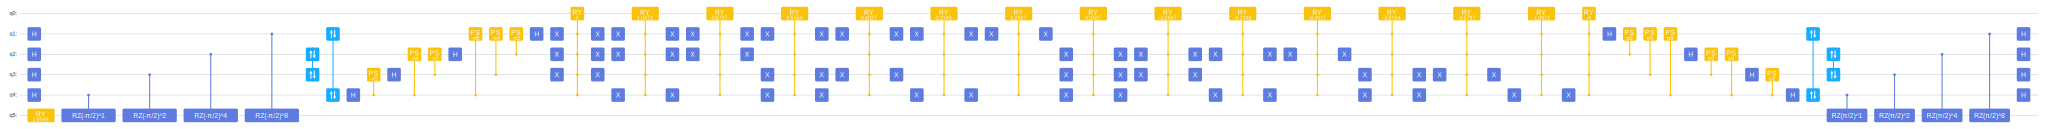

In [4]:
from mindquantum.algorithm.library import qft

# q1 ~ q4 : for QPE
t = 4
qc = [4, 3, 2, 1]

# store |b> , and store the result |x>
qb = 5

# use for conditional rotation
qs = 0

# choose a time evolution
dt = np.pi / 4

# choose a small C
C = 0.5

circ = Circuit()

# prepare b
circ += RY(2 * np.arcsin(0.8)).on(qb)

# QPE
for i in qc:
    circ += H.on(i)

for (i, q) in enumerate(qc):
    circ += Power(RZ(-2 * dt), 2**i).on(qb, q)

# apply inverse QFT
circ += qft(list(reversed(qc))).hermitian()

# conditional rotate
circ += BARRIER
for k in range(1, 2**t):
    for i in range(t):
        if (k & (1 << i)) == 0:
            circ += X.on(qc[i])
    phi = k / (2**t)
    if k > 2**(t-1):
        phi -= 1.0
    l = 2 * np.pi / dt * phi
    circ += RY(2 * np.arcsin(C / l)).on(qs, qc)

    for i in range(t):
        if (k & (1 << i)) == 0:
            circ += X.on(qc[i])
    circ += BARRIER

# apply inverse QPE
circ += qft(list(reversed(qc)))

for (i, q) in enumerate(qc):
    circ += Power(RZ(2 * dt), 2**i).on(qb, q)

for i in qc:
    circ += H.on(i)

circ.svg()

How do we verify the correctness of our results? Through measurement. Since the result is a quantum state $|x\rangle$, currently MindQuantum does not have a method to directly extract the internal values of a specific qubit. Therefore, we can only obtain information about the state through measurement.

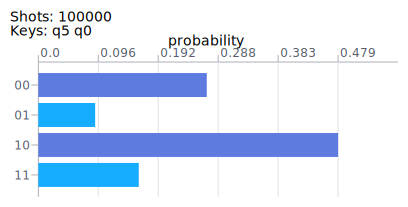

In [5]:
sim = Simulator(backend="mqvector", n_qubits=2 + t)
sim.apply_circuit(circ)

circ_m = Circuit()
circ_m += Measure().on(qs)
circ_m += Measure().on(qb)

res = sim.sampling(circ_m, shots=100000)
res.svg()

In [6]:
res.data.get("01", 0) / (res.data.get("01", 0) + res.data.get("11", 0))

0.3612780010344965

By statistically analyzing the measurement results of `q5` when `q0` is 1, we observe that the proportion of `q5 = 0` is `0.36`, which is consistent with the expected answer.

However, this method only provides information about the magnitude of the amplitudes. To obtain more information, such as phase, adjustments to the measurement would be required, but we won't discuss that here.

In [7]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.23.5
System,Info
Python,3.9.16
OS,Linux x86_64
Memory,8.3 GB
CPU Max Thread,8
Date,Sat Dec 30 23:19:52 2023
